Descripción del proyecto

Has decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, así que tú y tus compañeros decidís intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, ¿serás capaz de mantener tu éxito cuando la novedad de los camareros robot desaparezca?

Eres un gurú del análisis así que te han pedido que prepares un estudio de mercado. Tienes datos procedentes de fuentes abiertas sobre restaurantes en LA.

In [2]:
import pandas as pd

# Ruta del archivo
file_path = '/rest_data_us_upd.csv'

# Cargar los datos
data = pd.read_csv(file_path)

# Mostrar las primeras filas y la información del DataFrame
data_head = data.head()
data_info = data.info()

data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


(      id          object_name                  address  chain object_type  \
 0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
 1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
 2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
 3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
 4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   
 
    number  
 0      26  
 1       9  
 2      20  
 3      22  
 4      20  ,
 None)

Hay 3 valores ausentes en la columna chain y no hay filas duplicadas.

Voy a llenar los valores ausentes en la columna chain y luego verificaré que el tipo de datos en cada columna sea correcto. Dado que la columna chain debería ser booleana (True/False), podemos asumir que los valores ausentes se refieren a restaurantes que no son parte de una cadena (False).

In [3]:
# Revisar valores ausentes
missing_values = data.isnull().sum()

# Revisar duplicados
duplicate_rows = data.duplicated().sum()

# Mostrar valores ausentes y filas duplicadas
missing_values, duplicate_rows


(id             0
 object_name    0
 address        0
 chain          3
 object_type    0
 number         0
 dtype: int64,
 0)

In [5]:
# Llenar valores ausentes en la columna 'chain' con False
data['chain'].fillna(False, inplace=True)

# Verificar tipos de datos
data.dtypes

id              int64
object_name    object
address        object
chain            bool
object_type    object
number          int64
dtype: object

**Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.**

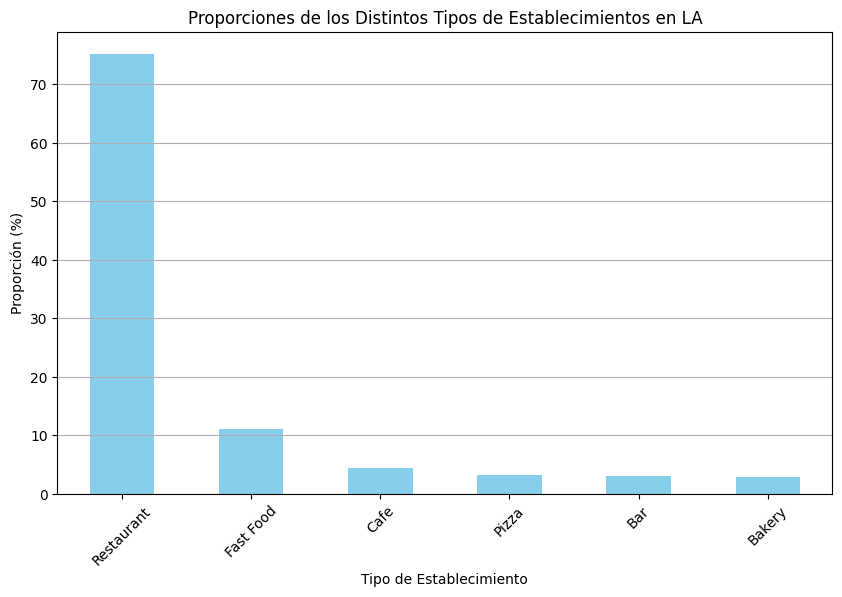

object_type
Restaurant    75.173557
Fast Food     11.045488
Cafe           4.507305
Pizza          3.315719
Bar            3.025593
Bakery         2.932339
Name: proportion, dtype: float64

In [6]:
import matplotlib.pyplot as plt

# Calcular las proporciones de los distintos tipos de establecimientos
type_proportions = data['object_type'].value_counts(normalize=True) * 100

# Crear el gráfico de proporciones
plt.figure(figsize=(10, 6))
type_proportions.plot(kind='bar', color='skyblue')
plt.title('Proporciones de los Distintos Tipos de Establecimientos en LA')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

# Mostrar las proporciones
type_proportions


**Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.**

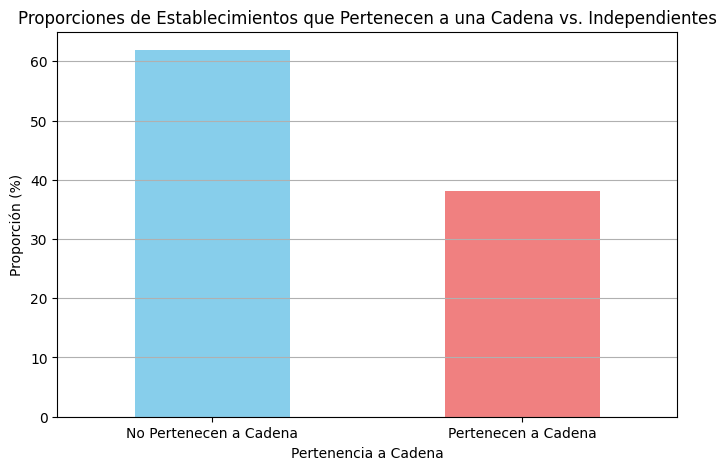

chain
False    61.910683
True     38.089317
Name: proportion, dtype: float64

In [7]:
# Calcular las proporciones de los establecimientos que pertenecen a una cadena y los que no
chain_proportions = data['chain'].value_counts(normalize=True) * 100

# Crear el gráfico de proporciones
plt.figure(figsize=(8, 5))
chain_proportions.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Proporciones de Establecimientos que Pertenecen a una Cadena vs. Independientes')
plt.xlabel('Pertenencia a Cadena')
plt.ylabel('Proporción (%)')
plt.xticks(ticks=[0, 1], labels=['No Pertenecen a Cadena', 'Pertenecen a Cadena'], rotation=0)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

# Mostrar las proporciones
chain_proportions


**¿Qué tipo de establecimiento es habitualmente una cadena?**

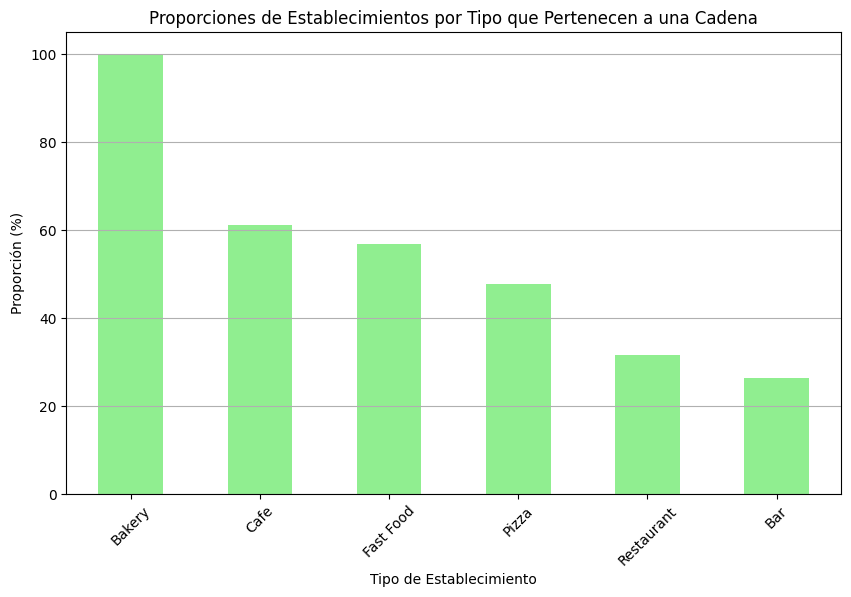

object_type
Bakery        100.000000
Cafe           61.149425
Fast Food      56.754221
Pizza          47.812500
Restaurant     31.592006
Bar            26.369863
Name: True, dtype: float64

In [8]:
# Calcular la proporción de cada tipo de establecimiento que pertenece a una cadena
chain_by_type = data.groupby('object_type')['chain'].value_counts(normalize=True).unstack().fillna(0) * 100

# Extraer las proporciones de los que pertenecen a una cadena
chain_types_proportion = chain_by_type[True].sort_values(ascending=False)

# Crear el gráfico de proporciones
plt.figure(figsize=(10, 6))
chain_types_proportion.plot(kind='bar', color='lightgreen')
plt.title('Proporciones de Establecimientos por Tipo que Pertenecen a una Cadena')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

# Mostrar las proporciones
chain_types_proportion


**¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?**

In [9]:
# Calcular la media y mediana del número de asientos para establecimientos que pertenecen a una cadena y los que no
chain_seating_stats = data.groupby('chain')['number'].agg(['mean', 'median'])

# Mostrar las estadísticas
chain_seating_stats


,mean,median
chain,,
False,46.156653,28.0
True,39.694233,25.0


Esto sugiere que las cadenas tienden a tener establecimientos con un número ligeramente menor de asientos en promedio, lo que podría indicar una estrategia de muchos establecimientos con un pequeño número de asientos.

**Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.**

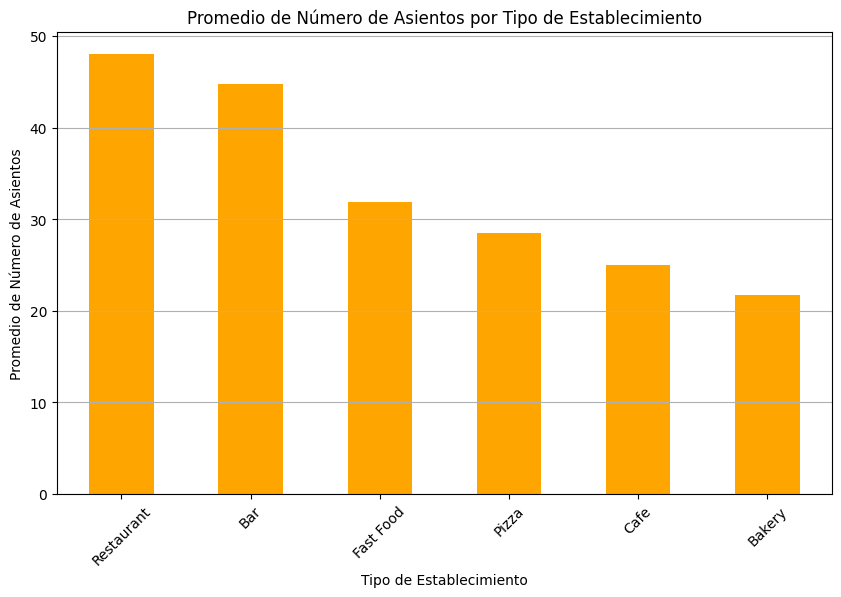

object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

In [10]:
# Calcular el promedio de número de asientos para cada tipo de restaurante
seating_by_type = data.groupby('object_type')['number'].mean().sort_values(ascending=False)

# Crear el gráfico de promedios de asientos por tipo de restaurante
plt.figure(figsize=(10, 6))
seating_by_type.plot(kind='bar', color='orange')
plt.title('Promedio de Número de Asientos por Tipo de Establecimiento')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Promedio de Número de Asientos')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

# Mostrar los promedios
seating_by_type


**Coloca los datos de los nombres de las calles de la columna address en una columna separada.**

In [11]:
# Extraer los nombres de las calles de la columna 'address'
data['street_name'] = data['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Mostrar las primeras filas para verificar
data[['address', 'street_name']].head()


,address,street_name
0,3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD
1,100 WORLD WAY 120,WORLD WAY 120
2,6801 HOLLYWOOD BLVD 253,HOLLYWOOD BLVD 253
3,1814 W SUNSET BLVD,W SUNSET BLVD
4,2100 ECHO PARK AVE,ECHO PARK AVE


**Traza un gráfico de las diez mejores calles por número de restaurantes.**

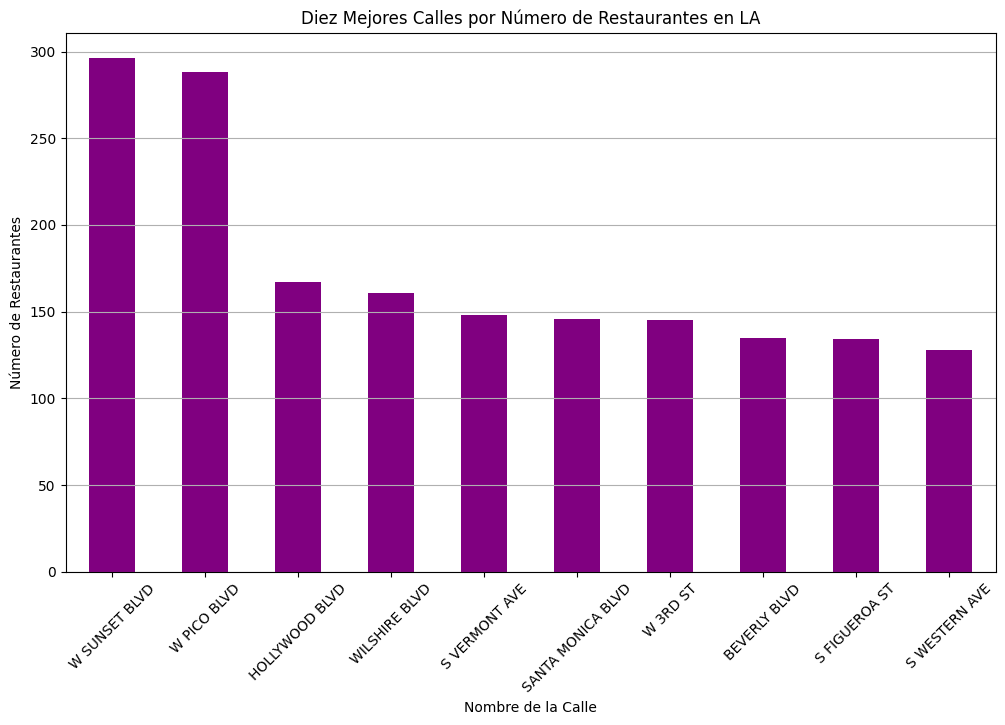

street_name
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: count, dtype: int64

In [12]:
# Contar el número de restaurantes por nombre de calle
top_streets = data['street_name'].value_counts().head(10)

# Crear el gráfico de las diez mejores calles por número de restaurantes
plt.figure(figsize=(12, 7))
top_streets.plot(kind='bar', color='purple')
plt.title('Diez Mejores Calles por Número de Restaurantes en LA')
plt.xlabel('Nombre de la Calle')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

# Mostrar las diez mejores calles
top_streets


**Encuentra el número de calles que solo tienen un restaurante.**

In [13]:
# Contar el número de restaurantes por nombre de calle
street_counts = data['street_name'].value_counts()

# Contar el número de calles que solo tienen un restaurante
streets_with_one_restaurant = street_counts[street_counts == 1].count()

streets_with_one_restaurant


2445

**Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?**

<Figure size 1400x800 with 0 Axes>

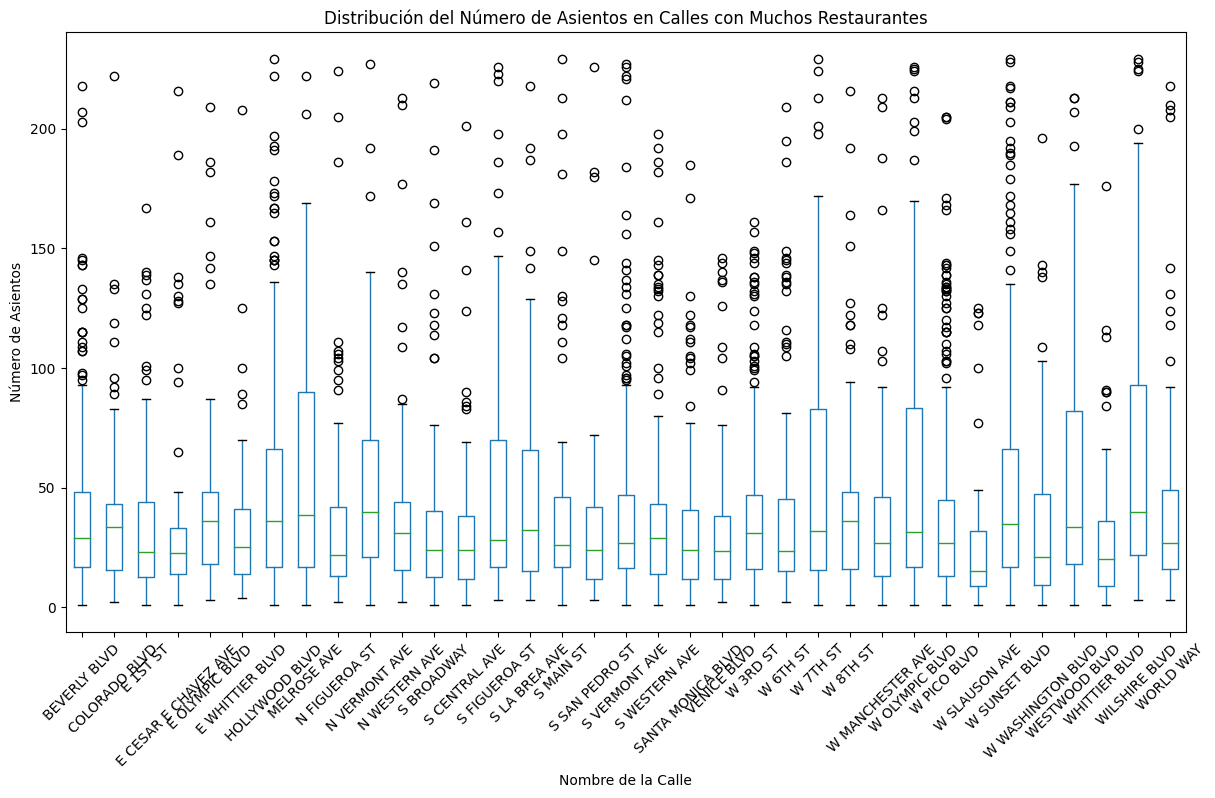

,count,mean,std,min,25%,50%,75%,max
street_name,,,,,,,,
BEVERLY BLVD,135.0,44.770370,43.946362,1.0,17.00,29.0,48.00,218.0
COLORADO BLVD,60.0,40.600000,40.122778,2.0,15.75,33.5,43.00,222.0
E 1ST ST,78.0,37.948718,39.090935,1.0,12.50,23.0,44.00,167.0
E CESAR E CHAVEZ AVE,66.0,36.757576,45.029242,1.0,14.00,22.5,33.25,216.0
E OLYMPIC BLVD,53.0,49.547170,49.790934,3.0,18.00,36.0,48.00,209.0
E WHITTIER BLVD,57.0,34.315789,33.289937,4.0,14.00,25.0,41.00,208.0
HOLLYWOOD BLVD,167.0,53.730539,53.512912,1.0,17.00,36.0,66.00,229.0
MELROSE AVE,128.0,52.429688,47.245828,1.0,16.75,38.5,90.00,222.0
N FIGUEROA ST,85.0,37.376471,42.815211,2.0,13.00,22.0,42.00,224.0


In [14]:
# Filtrar las calles con más de 50 restaurantes
top_streets_many_restaurants = street_counts[street_counts > 50].index
data_top_streets = data[data['street_name'].isin(top_streets_many_restaurants)]

# Analizar la distribución del número de asientos para estas calles
seat_distribution = data_top_streets.groupby('street_name')['number'].describe()

# Crear boxplot de la distribución del número de asientos
plt.figure(figsize=(14, 8))
data_top_streets.boxplot(column='number', by='street_name', grid=False, rot=45, figsize=(14, 8))
plt.title('Distribución del Número de Asientos en Calles con Muchos Restaurantes')
plt.suptitle('')
plt.xlabel('Nombre de la Calle')
plt.ylabel('Número de Asientos')
plt.show()

# Mostrar las estadísticas descriptivas
seat_distribution


Las estadísticas descriptivas y el boxplot muestran la distribución del número de asientos en calles con muchos restaurantes. Aquí hay algunas observaciones:

Las calles con más restaurantes, como W SUNSET BLVD y W PICO BLVD, tienen una distribución amplia de asientos, con promedios de 50.92 y 40.88 respectivamente.
HOLLYWOOD BLVD y WILSHIRE BLVD también tienen un número considerable de asientos, con medias de 53.73 y 62.13.
Las calles como WILSHIRE BLVD, W OLYMPIC BLVD, y W 7TH ST tienen algunos restaurantes con una capacidad de asientos significativamente alta (más de 200 asientos en algunos casos).
Las distribuciones tienden a mostrar que mientras algunas calles tienen restaurantes con un gran número de asientos, la mayoría de los restaurantes tienen un número de asientos que cae en el rango de 20-70.
Estas tendencias indican que las calles más populares tienden a tener una mezcla de restaurantes con diferentes capacidades de asientos, posiblemente para atender a una amplia variedad de clientes y ocasiones.

Conclusiones

Predominancia de Restaurantes y Comida Rápida:

Los restaurantes representan el 75.17% del total de establecimientos en Los Ángeles, seguidos de la comida rápida con el 11.05%.
Esto sugiere que el mercado está dominado por opciones tradicionales de restaurantes, con una demanda significativa por opciones de comida rápida.

Cadenas vs. Independientes:

El 38.09% de los establecimientos son cadenas, mientras que el 61.91% son independientes.
Las cadenas son más comunes entre las panaderías (100%), cafés (61.15%) y comida rápida (56.75%).
Número de Asientos:

Los establecimientos que no pertenecen a cadenas tienen un promedio de 46.16 asientos, mientras que los que sí pertenecen a cadenas tienen un promedio de 39.69 asientos.
Esto indica que las cadenas tienden a tener establecimientos más pequeños en términos de capacidad de asientos.

Distribución de Asientos por Tipo de Establecimiento:

Los restaurantes y bares tienen el mayor promedio de asientos con 48.04 y 44.77 respectivamente.
Las panaderías y los cafés tienen menos asientos en promedio, 21.77 y 25 respectivamente.

Calles con Muchos Restaurantes:

Las calles más populares, como W SUNSET BLVD, W PICO BLVD, y HOLLYWOOD BLVD, muestran una amplia variabilidad en el número de asientos, con algunas calles teniendo restaurantes con más de 200 asientos.
La mayoría de los restaurantes en estas calles tienen entre 20-70 asientos, indicando una mezcla de establecimientos grandes y pequeños.

Recomendaciones

Tipo de Restaurante:

Dada la predominancia y la aceptación de los restaurantes tradicionales, abrir un restaurante puede ser una opción viable.
Sin embargo, dado el crecimiento de la comida rápida y los cafés, considerar un concepto de comida rápida o café con un enfoque innovador (como los camareros robots) podría atraer a una clientela diversa y aprovechar la tendencia de crecimiento en estos segmentos.

Número de Asientos:

Para maximizar la eficiencia y reducir los costos iniciales, comenzar con un número moderado de asientos (alrededor de 30-50) puede ser una estrategia efectiva.
Este rango de asientos es consistente con las tendencias observadas en establecimientos exitosos, tanto independientes como de cadenas.

Desarrollo de una Cadena:

Dada la alta prevalencia de cadenas entre las panaderías, cafés y establecimientos de comida rápida, estos tipos de negocios parecen tener una mayor capacidad para expandirse como cadenas.
Un café o un restaurante de comida rápida innovador y único (por ejemplo, con camareros robots) podría escalarse más fácilmente en comparación con un restaurante tradicional de gran tamaño.

Ubicación:

Considerar la ubicación en calles con alta concentración de restaurantes como W SUNSET BLVD y W PICO BLVD, donde hay una alta afluencia de clientes potenciales.
Estas ubicaciones han demostrado ser exitosas para una variedad de restaurantes y podrían proporcionar una buena base para el negocio inicial.

Posibilidad de Desarrollar una Cadena

Desarrollar una cadena de cafés o establecimientos de comida rápida innovadores podría ser altamente viable, dado el éxito de cadenas en estos segmentos. La clave será mantener la novedad y la calidad del servicio (como el uso de camareros robots) para diferenciarse y atraer tanto a clientes nuevos como recurrentes. Comenzar con un modelo escalable en términos de tamaño y operación puede facilitar la expansión a múltiples ubicaciones en el futuro.

# Café Robotizado en Los Ángeles
## Estudio de Mercado y Análisis de Viabilidad

### Tabla de Contenidos
1. [Apertura de Datos](#apertura-de-datos)
2. [Preprocesamiento de Datos](#preprocesamiento-de-datos)
    * [Procesamiento de Valores Ausentes](#procesamiento-de-valores-ausentes)
    * [Procesamiento de Duplicados](#procesamiento-de-duplicados)
3. [Análisis de Datos](#análisis-de-datos)
    * [Proporción de Tipos de Establecimientos](#proporción-de-tipos-de-establecimientos)
    * [Cadenas vs. Independientes](#cadenas-vs-independientes)
    * [Número de Asientos](#número-de-asientos)
    * [Calles Populares](#calles-populares)
4. [Conclusiones](#conclusiones)
5. [Recomendaciones](#recomendaciones)
6. [Desarrollo de Cadena](#desarrollo-de-cadena)
7. [Próximos Pasos](#próximos-pasos)

<a id="apertura-de-datos"></a>
### Apertura de Datos
- Proyecto: Apertura de un café regentado por robots en Los Ángeles
- Objetivo: Atraer inversionistas a través de un estudio de mercado
- Datos: Información sobre restaurantes en LA de fuentes abiertas

<a id="preprocesamiento-de-datos"></a>
### Preprocesamiento de Datos
<a id="procesamiento-de-valores-ausentes"></a>
#### Procesamiento de Valores Ausentes
- Los datos contienen valores ausentes en la columna `chain`
- Valores ausentes fueron llenados con `False`

<a id="procesamiento-de-duplicados"></a>
#### Procesamiento de Duplicados
- No se encontraron filas duplicadas en los datos

<a id="análisis-de-datos"></a>
### Análisis de Datos
<a id="proporción-de-tipos-de-establecimientos"></a>
#### Proporción de Tipos de Establecimientos
- Gráfico de barras: Proporciones de diferentes tipos de establecimientos
- Observaciones:
  - Los restaurantes dominan el mercado (75.17%)
  - Comida rápida y cafés tienen un crecimiento significativo

<a id="cadenas-vs-independientes"></a>
#### Cadenas vs. Independientes
- Gráfico de barras: Proporciones de cadenas e independientes
- Observaciones:
  - 38.09% son cadenas
  - Cadenas comunes en panaderías, cafés y comida rápida

<a id="número-de-asientos"></a>
#### Número de Asientos
- Promedio de asientos por tipo de establecimiento
- Observaciones:
  - Restaurantes y bares tienen más asientos en promedio
  - Las cadenas tienden a tener menos asientos (39.69 vs. 46.16)

<a id="calles-populares"></a>
#### Calles Populares
- Gráfico de barras: Diez mejores calles por número de restaurantes
- Observaciones:
  - W SUNSET BLVD y W PICO BLVD tienen la mayor concentración de restaurantes
  - Variabilidad en el número de asientos en estas calles

<a id="conclusiones"></a>
### Conclusiones
- Predominancia de restaurantes tradicionales y crecimiento en comida rápida y cafés
- Mayoría de establecimientos independientes
- Variabilidad en el número de asientos por ubicación

<a id="recomendaciones"></a>
### Recomendaciones
- Tipo de restaurante: Comida rápida o café innovador
- Número de asientos: 30-50 asientos para maximizar eficiencia
- Ubicación: Calles con alta concentración de restaurantes

<a id="desarrollo-de-cadena"></a>
### Desarrollo de Cadena
- Viabilidad de expandir como cadena
- Mantener novedad y calidad del servicio
- Modelo escalable para facilitar expansión

<a id="próximos-pasos"></a>
### Próximos Pasos
- Preparación para abrir el primer café
- Estrategia de marketing para atraer clientes
- Plan de expansión a otras ubicaciones


In [23]:
# Guardar el contenido en un archivo Markdown
markdown_file_path = "/mnt/data/Presentacion_Cafe_Robotizado.md"
with open(markdown_file_path, "w") as file:
    file.write(markdown_content)

markdown_file_path

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Presentacion_Cafe_Robotizado.md'